<a href="https://colab.research.google.com/github/madhuresh97/IntroToML/blob/main/MLAssignment1_Question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Madhuresh Gupta

NUID: 002198926

Adding all the necessary import statements that are required for the question below

# **Question 3:**
We need to perform minimum probability of error classifiers for 2 datasets, covariance and mean matrices, estimate class priors, regularize, count the errors, and report the error probability estimate. Also we will share the confusion matrix.

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.stats import multivariate_normal
import pandas as pd

def getConfusionMatrix(classifierresults, testclasses, classes):
    classifier_result = np.equal(np.transpose(np.tile(classes, (classifierresults.size, 1))), classifierresults)
    classmatrix = np.equal(np.transpose(np.tile(classes, (classifierresults.size,1))), testclasses)
    confusion_matrix = np.empty((classes.size, classes.size))

    for i in range(classes.size):
        tempclass = np.tile(classmatrix[i], (classes.size, 1))

        outvector = np.sum(np.logical_and(classifier_result, tempclass), axis=1)/classifierresults.size
        confusion_matrix[:,i] = outvector
        
    return np.transpose(confusion_matrix)

def minErrorClassifier(testdata, testlabels):
    classes = np.unique(testlabels)
    classmask = np.equal(np.tile(classes, (testlabels.size,1)), np.transpose(testlabels))
    databyclass = np.empty(classes.size, dtype='object')
    covbyclass = np.empty(classes.size, dtype='object')
    regcovbyclass = np.empty(classes.size, dtype='object')
    meanbyclass = np.empty(classes.size, dtype='object')
    regularizinglambdas = np.empty(classes.size)
    classpriors = np.sum(classmask, axis = 0)/testlabels.size
    print(classpriors)
    classprobabilitymatrix = np.empty((testlabels.size, classes.size))
    
    for i in range(classes.size):
        databyclass[i] = testdata[classmask[:,i]]
        covbyclass[i] = np.cov(databyclass[i], rowvar=False)
        regularizinglambdas[i] = np.trace(covbyclass[i])/np.linalg.matrix_rank(covbyclass[i])
        print(classes[i])
        print(regularizinglambdas[i])
    
    regularizinglambda = np.average(regularizinglambdas)
    # regularizinglambda = .05
    
    print("Regularizing lambda is %f" % (regularizinglambda))
        
    for i in range(classes.size):
        regcovbyclass[i] = covbyclass[i] + regularizinglambda*np.identity(np.shape(testdata)[1])
        meanbyclass[i] = np.mean(databyclass[i], axis=0)
        classprobabilitymatrix[:,i] = classpriors[i]*multivariate_normal.pdf(testdata, meanbyclass[i], regcovbyclass[i])
        
    classifierresults = classes[np.argmax(classprobabilitymatrix, axis=1)]
    return classifierresults, covbyclass, meanbyclass, databyclass

def getErrorProbability(actual_labels, classifierresults):
        return np.sum(np.logical_not(np.equal(classifierresults, actual_labels)))/actual_labels.size*100


##Part 1- Using Wine Dataset:
a. Estimating the Mean and Covariance Matrices-

[0.06472029 0.32788893 0.2564312  0.18497346 0.13781135 0.02674561
 0.00142915]
8
225.47995658981696
9
289.32378428892747
10
284.68720839671903
11
222.0819228410422
12
143.48782106446055
13
175.94236168507678
14
82.62359638888887
Regularizing lambda is 203.375236


 Wine Confusion Matrix: 
     8         9         10        11        12   13   14
8   0.0  0.057166  0.007146  0.000408  0.000000  0.0  0.0
9   0.0  0.244181  0.060229  0.011637  0.011842  0.0  0.0
10  0.0  0.135361  0.082687  0.020416  0.017967  0.0  0.0
11  0.0  0.067170  0.061658  0.031441  0.024704  0.0  0.0
12  0.0  0.035525  0.051654  0.021641  0.028991  0.0  0.0
13  0.0  0.005104  0.012250  0.005512  0.003879  0.0  0.0
14  0.0  0.000204  0.000612  0.000000  0.000612  0.0  0.0


Wine Error Probability:  61.269906084115966


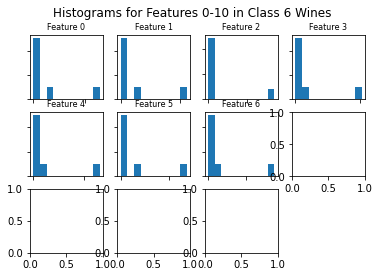

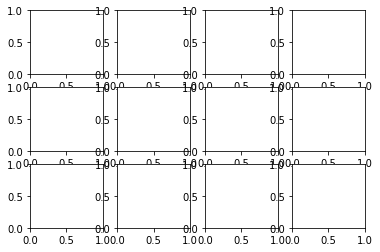

In [ ]:
#adding wine dataset from the session storage in google colab
#only using white wine dataset
winetestdata = np.loadtxt(r'/content/winequality-white.csv', delimiter=';', skiprows=1, usecols=(0,1,2,3,4,5,6))
winetestlabels = np.array([np.loadtxt(r'/content/winequality-white.csv', delimiter=';', skiprows=1, usecols=10, dtype='int8')])
wineclasses = np.unique(winetestlabels)

wineclassifierresults, winecov, winemean, winedatabyclass = minErrorClassifier(winetestdata, winetestlabels)
wineconfusion = pd.DataFrame(getConfusionMatrix(wineclassifierresults, winetestlabels, wineclasses), index=wineclasses, columns=wineclasses)
wineerrorprob = getErrorProbability(winetestlabels, wineclassifierresults)

print('\n\n Wine Confusion Matrix: ')
print(wineconfusion)
print('\n')
print('Wine Error Probability: ', wineerrorprob, )

fig, axes = plt.subplots(3,4)

for i in range(np.shape(winetestdata)[1]):
    axes.flat[i].hist(winedatabyclass[3][i])
    axes.flat[i].set_title("Feature %i" % i, fontsize=8)
    axes.flat[i].xaxis.set_ticklabels([])
    axes.flat[i].yaxis.set_ticklabels([])

axes.flat[11].set_visible(False)
fig.suptitle("Histograms for Features 0-10 in Class 6 Wines")

fig2, axes2 = plt.subplots(3,4)



##Part 2- Using HAR Dataset:
Loading the HAR dataset-

In [ ]:
HARdata = np.loadtxt(r'/content/X_test.txt')
HARlabels = np.array([np.loadtxt(r'/content/y_test.txt', dtype='int8')])
HARclasses = np.array([1,2,3,4,5,6])

HARclassifierresults, HARcov, HARmean, HARdata = minErrorClassifier(HARdata, HARlabels)
HARconfusion = pd.DataFrame(getConfusionMatrix(HARclassifierresults, HARlabels, HARclasses), index=HARclasses, columns=HARclasses)
HARerrorprob = getErrorProbability(HARlabels, HARclassifierresults)


print('\n\n Human Activity Confusion Matrix: ')
print(HARconfusion)
print('\n')
print('Human Activity Error Probability: ', HARerrorprob, '\n\n')


[0.16830675 0.15982355 0.14251781 0.16661011 0.18052257 0.18221921]
1
0.040941002268860396
2
0.0383241479061296
3
0.06076292492219347
4
0.03223197384071751
5
0.03135624768511522
6
0.04014766539233752
Regularizing lambda is 0.040627


 Human Activity Confusion Matrix: 
          1         2         3         4         5         6
1  0.168307  0.000000  0.000000  0.000000  0.000000  0.000000
2  0.000000  0.159824  0.000000  0.000000  0.000000  0.000000
3  0.000000  0.000679  0.141839  0.000000  0.000000  0.000000
4  0.000000  0.000000  0.000000  0.165931  0.000679  0.000000
5  0.000000  0.000000  0.000000  0.000339  0.180183  0.000000
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.182219


Human Activity Error Probability:  0.16966406515100102 


